<a href="https://colab.research.google.com/github/ArmstrongVo/ArmstrongVo.github.io/blob/main/W2_AI_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import skfuzzy as fuzz
x= np.arange(11)
mfx=fuzz.trimf(x,[0,5,10])



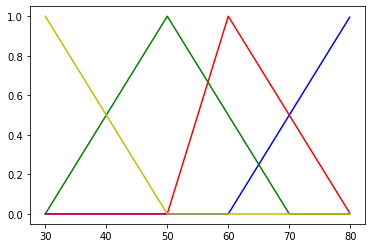

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,80,0.1)
slow = fuzz.trimf(x,[30,30,50])
medium = fuzz.trimf(x,[30,50,70])
medium_fast=fuzz.trimf(x,[50,60,80])
full_speed = fuzz.trimf(x,[60,80,80])
plt.figure()
plt.plot(x,full_speed,'b')
plt.plot(x,medium_fast,'r')
plt.plot(x,medium,'g')
plt.plot(x,slow,'y')


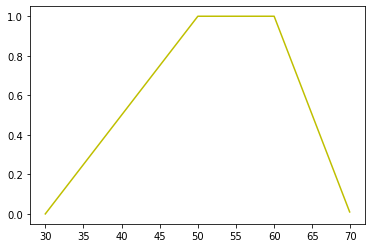

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,70,0.1)
slow = fuzz.trapmf(x,[30,50,60,70])
#medium = fuzz.trapmf(x,[30,70,70,30])

#medium_fast=fuzz.trapmf(x,[50,60,60,50])
#full_speed = fuzz.trapmf(x,[60,80,80,60])
plt.figure()
#plt.plot(x,full_speed,'b')
#plt.plot(x,medium_fast,'r')
#plt.plot(x,medium,'g')
plt.plot(x,slow,'y')




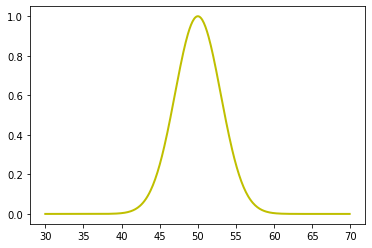

In [ ]:
from skfuzzy.membership.generatemf import gaussmf
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,70,0.1)
gaus=gaussmf(x,50,3)
plt.figure()
plt.plot(x,gaus,'y',label='GAUS', linewidth=2)



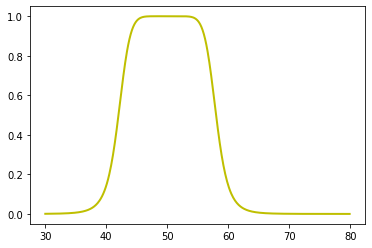

In [ ]:

from skfuzzy.membership.generatemf import gaussmf
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,80,0.1)
BELL=fuzz.gbellmf(x,8,4,50)
plt.figure()
plt.plot(x,BELL,'y',label='BELL', linewidth=2)


25.56900310279245


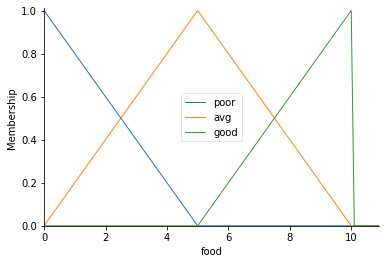

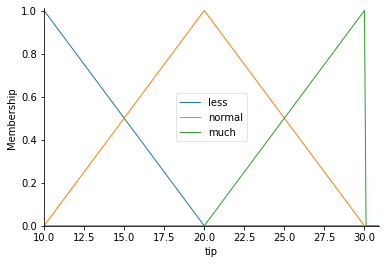

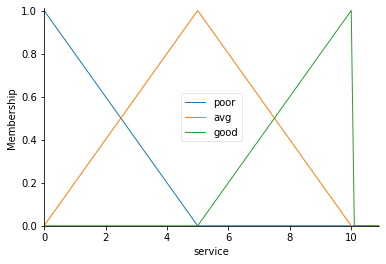

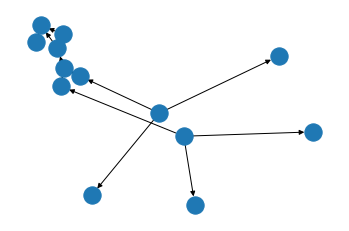

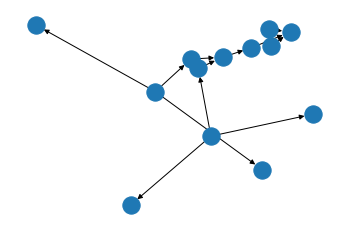

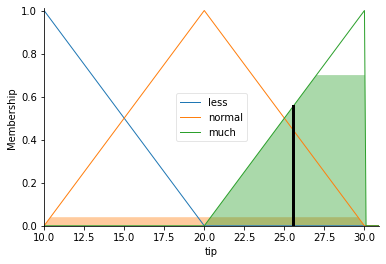

In [ ]:
from matplotlib import figure
from skfuzzy.membership.generatemf import gaussmf
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 
food=ctrl.Antecedent(np.arange(0,11,0.1),'food')
service=ctrl.Antecedent(np.arange(0,11,0.1),'service')
tip=ctrl.Consequent(np.arange(10,31,0.1),'tip')
#tạo ra 1 tín hiệu input từ 0-10 với độ phân giải là 1
#tạo ra 1 tín hiệu output từ 10-31 với độ phân giải là 1
# tự động bằng câu lệnh automsf(n)_ n là số lẻ
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['avg']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10]) 
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['avg']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])   
tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['normal']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30]) 
food.view()      
tip.view()   
service.view()            
rule1=ctrl.Rule(food['poor']&service['poor'],tip['less'])                        
rule2=ctrl.Rule(food['avg']&service['poor'],tip['less']) 
rule3=ctrl.Rule(food['good']&service['poor'],tip['normal']) 
rule4=ctrl.Rule(food['poor']&service['avg'],tip['less']) 
rule5=ctrl.Rule(food['avg']&service['avg'],tip['normal'])  
rule6=ctrl.Rule(food['good']&service['avg'],tip['much'])  
rule7=ctrl.Rule(food['poor']&service['good'],tip['normal']) 
rule8=ctrl.Rule(food['avg']&service['good'],tip['much']) 
rule9=ctrl.Rule(food['good']&service['good'],tip['much']) 
rule1.view()
rule2.view()
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=6.5
tipping.input['service']=9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)
  
